In [1]:
import numpy as np
import sempler
import sempler.generators
import src.utils as utils
import src.metrics as metrics

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import gridspec

import pickle
import os


import time

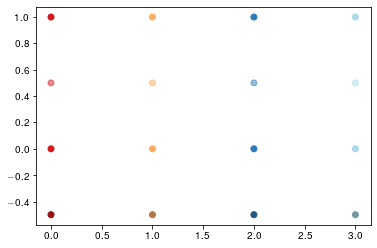

In [2]:
# Set tex formatting for plots
from matplotlib import rc
#rc('font',**{'family':'serif','sans-serif':['Computer Modern Roman']})
rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       r'\usepackage{helvet}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
]  
#plt.rcParams["font.family"] = "serif"
#plt.rcParams["font.serif"] = ["Computer Modern Roman"]

# Set legend size
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')
# Colors
def to_rgb(H, b=1, a=1):
    RGBa = []
    for h in H:
        h = h.lstrip("#")
        RGBa.append(tuple(int(h[i:i+2], 16) / 256 * b for i in (0, 2, 4)) + (a,))
    return np.array(RGBa)

cmap = matplotlib.cm.get_cmap('tab20')
base = ['#d7191c', '#fdae61', '#2c7bb6', '#abd9e9']
plt.scatter(np.arange(len(base)), np.ones(len(base)), c = base)
colors = to_rgb(base)
colorsa = to_rgb(base, a=0.5)
colorsb = to_rgb(base, b=0.7)
plt.scatter(np.arange(len(colors)), np.zeros(len(colors)), c = colors)
plt.scatter(np.arange(len(colors)), np.ones(len(colors))*0.5, c = colorsa)
plt.scatter(np.arange(len(colors)), np.ones(len(colors))*-0.5, c = colorsb)

In [3]:
directory = "synthetic_experiments/dataset_1656422452_runs:10_seed:42_G:100_k:2.7_p:10_w_min:0.5_w_max:1_v_min:1_v_max:2_envs:4_i_type:noise_i_size:1_i_v_min:5_i_v_max:10_n:10,100,1000/"

In [4]:
test_cases = utils.read_pickle(directory + 'test_cases.pickle')
gnies_args, gnies_results = utils.read_pickle(directory + "compiled_results_gnies.pickle")
ut_igsp_args, ut_igsp_results = utils.read_pickle(directory + "compiled_results_ut_igsp.pickle")
ground_truth, computed_metrics = utils.read_pickle(directory + "metrics.pickle")

In [5]:
computed_metrics.keys()

dict_keys(['gnies', 'ut_igsp'])

In [6]:
Ns = test_cases['Ns']

In [7]:
gnies_lambdas = gnies_args[2]
gnies_lambdas

array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ])

In [8]:
ut_igsp_args

(Namespace(alpha_hi=0.05, alpha_lo=0.001, beta_hi=0.05, beta_lo=0.001, chunksize=1, compile_only=False, debug=False, directory='/cluster/scratch/gajuan/synthetic_experiments/dataset_1656422452_copy/', n_alphas=10, n_betas=10, n_workers=1),
 array([0.001     , 0.00644444, 0.01188889, 0.01733333, 0.02277778,
        0.02822222, 0.03366667, 0.03911111, 0.04455556, 0.05      ]),
 array([0.001     , 0.00644444, 0.01188889, 0.01733333, 0.02277778,
        0.02822222, 0.03366667, 0.03911111, 0.04455556, 0.05      ]),
 [10, 100, 1000])

In [9]:
utigsp_alphas, utigsp_betas = ut_igsp_args[1], ut_igsp_args[2]
utigsp_alphas, utigsp_betas

(array([0.001     , 0.00644444, 0.01188889, 0.01733333, 0.02277778,
        0.02822222, 0.03366667, 0.03911111, 0.04455556, 0.05      ]),
 array([0.001     , 0.00644444, 0.01188889, 0.01733333, 0.02277778,
        0.02822222, 0.03366667, 0.03911111, 0.04455556, 0.05      ]))

## Full trajectories

### Class recovery

In [10]:
gnies_x = np.nanmean(computed_metrics['gnies'][metrics.type_1_structc], axis=(0,3))
gnies_y = 1 - np.nanmean(computed_metrics['gnies'][metrics.type_2_structc], axis=(0,3))

utigsp_x = np.nanmean(computed_metrics['ut_igsp'][metrics.type_1_structc], axis=(0,3))
utigsp_y = 1 - np.nanmean(computed_metrics['ut_igsp'][metrics.type_2_structc], axis=(0,3))

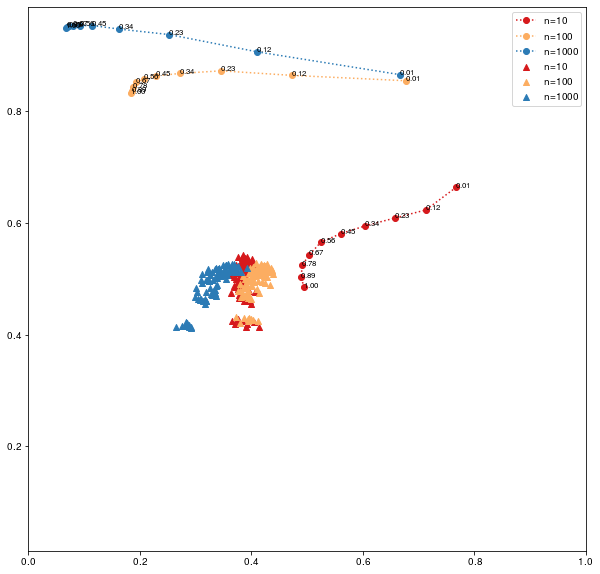

In [11]:
plt.figure(figsize=(10,10))
ax = plt.gca()

# Plot GnIES
for i,n in enumerate(Ns):
    ax.plot(gnies_x[:,i], gnies_y[:,i], label="n=%d" % n, color=colors[i], linestyle=':', marker='o')
    for j,l in enumerate(gnies_lambdas):
        ax.text(gnies_x[j,i], gnies_y[j,i], "%.2f" % l, fontsize=8)
        
# Plot UT-IGSP
for i,n in enumerate(Ns):
    ax.scatter(utigsp_x[:,:,i], utigsp_y[:,:,i], label="n=%d" % n, color=colors[i], marker='^')
    for j,a in enumerate(utigsp_alphas):
        for k,b in enumerate(utigsp_betas):
            pass
            #ax.text(utigsp_x[j,k,i], utigsp_y[j,k,i], "%.2f, %.2f" % (a,b), fontsize=8)
ax.axis('equal')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
plt.legend()

### Skeleton recovery

In [12]:
gnies_x = np.nanmean(computed_metrics['gnies'][metrics.type_1_skeleton], axis=(0,3))
gnies_y = 1 - np.nanmean(computed_metrics['gnies'][metrics.type_2_skeleton], axis=(0,3))

utigsp_x = np.nanmean(computed_metrics['ut_igsp'][metrics.type_1_skeleton], axis=(0,3))
utigsp_y = 1 - np.nanmean(computed_metrics['ut_igsp'][metrics.type_2_skeleton], axis=(0,3))

Text(0.5, 0, '')

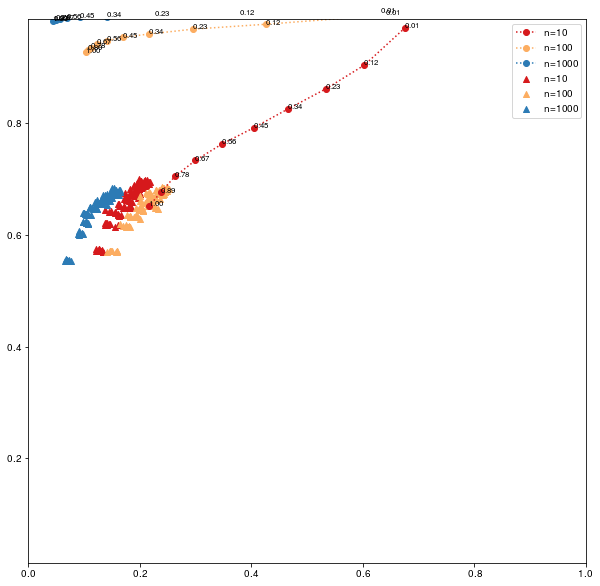

In [13]:
plt.figure(figsize=(10,10))
ax = plt.gca()

# Plot GnIES
for i,n in enumerate(Ns):
    ax.plot(gnies_x[:,i], gnies_y[:,i], label="n=%d" % n, color=colors[i], linestyle=':', marker='o')
    for j,l in enumerate(gnies_lambdas):
        ax.text(gnies_x[j,i], gnies_y[j,i], "%.2f" % l, fontsize=8)
        
# Plot UT-IGSP
for i,n in enumerate(Ns):
    ax.scatter(utigsp_x[:,:,i], utigsp_y[:,:,i], label="n=%d" % n, color=colors[i], marker='^')
    for j,a in enumerate(utigsp_alphas):
        for k,b in enumerate(utigsp_betas):
            pass
            #ax.text(utigsp_x[j,k,i], utigsp_y[j,k,i], "%.2f, %.2f" % (a,b), fontsize=8)
ax.axis('equal')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
plt.legend()
ax.set_xlabel("")

### Targets recovery

In [14]:
gnies_x = np.nanmean(computed_metrics['gnies'][metrics.type_1_I], axis=(0,3))
gnies_y = 1 - np.nanmean(computed_metrics['gnies'][metrics.type_2_I], axis=(0,3))

utigsp_x = np.nanmean(computed_metrics['ut_igsp'][metrics.type_1_I], axis=(0,3))
utigsp_y = 1 - np.nanmean(computed_metrics['ut_igsp'][metrics.type_2_I], axis=(0,3))

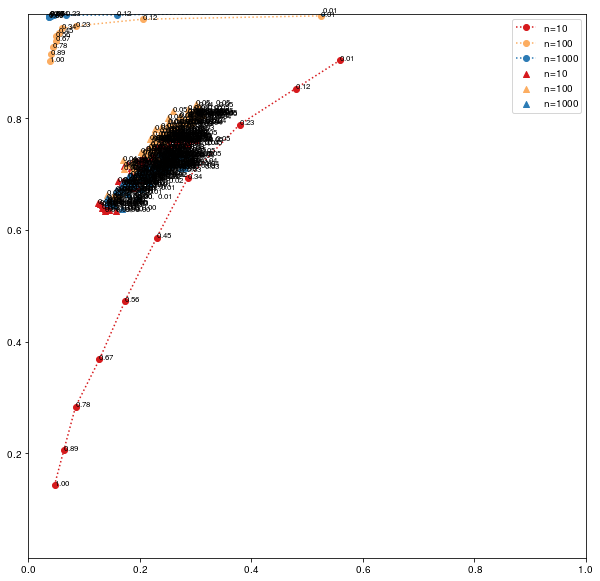

In [15]:
plt.figure(figsize=(10,10))
ax = plt.gca()

# Plot GnIES
for i,n in enumerate(Ns):
    ax.plot(gnies_x[:,i], gnies_y[:,i], label="n=%d" % n, color=colors[i], linestyle=':', marker='o')
    for j,l in enumerate(gnies_lambdas):
        ax.text(gnies_x[j,i], gnies_y[j,i], "%.2f" % l, fontsize=8)
        
# Plot UT-IGSP
for i,n in enumerate(Ns):
    ax.scatter(utigsp_x[:,:,i], utigsp_y[:,:,i], label="n=%d" % n, color=colors[i], marker='^')
    for j,a in enumerate(utigsp_alphas):
        for k,b in enumerate(utigsp_betas):
            ax.text(utigsp_x[j,k,i], utigsp_y[j,k,i], "%.2f, %.2f" % (a,b), fontsize=8)
ax.axis('equal')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
plt.legend()

In [16]:
directory = "synthetic_experiments/dataset_1657195197_runs:1_seed:42_G:1_k:2.7_p:6_w_min:0.5_w_max:1_v_min:1_v_max:2_envs:3_i_type:noise_i_size:1_i_v_min:5_i_v_max:10_n:1000/"
ut_igsp_args, ut_igsp_results = utils.read_pickle(directory + "compiled_results_ut_igsp.pickle")

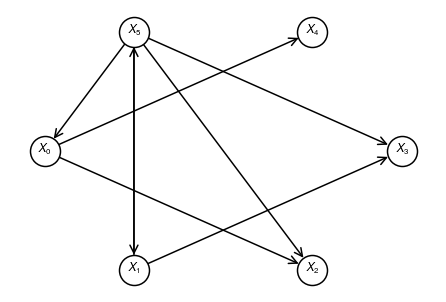

In [17]:
sempler.utils.plot_graph(ut_igsp_results['estimates'][0,0,0,0,0])